# Import

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.decomposition import DictionaryLearning
from metrics import root_mean_squared_relative_error

from utils import sliding_windows_partitions
from main import FinancialDictionaryLearning

import yfinance as yf

import matplotlib.pyplot as plt

TRAIN_PERCENTAGE = 0.8

% reload_ext autoreload
% autoreload 2

# Load a data

In [2]:
df = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
df = df['Close'].values.squeeze()
df

[*********************100%***********************]  1 of 1 completed


array([ 6.44741106,  6.45855904,  6.3558259 , ..., 70.23900604,
       70.65589905, 71.1721344 ])

In [3]:
data_historical = df[:int(TRAIN_PERCENTAGE*len(df))]
data_test = df[int(TRAIN_PERCENTAGE*len(df)):]

# Perform the dictionary learning

In [4]:
dict_learning = DictionaryLearning(n_components=200, transform_algorithm="omp", max_iter=1000)
dict_learning.fit(data_historical.reshape(-1, 1))

data_test_sparse = dict_learning.transform(data_test.reshape(-1, 1))
data_predicted =  np.dot(data_test_sparse, dict_learning.components_)

rmse = root_mean_squared_relative_error(data_test, data_predicted)
print(f"RMSE: {rmse}")

RMSE: 0.2208975410360049


# Print the prediction

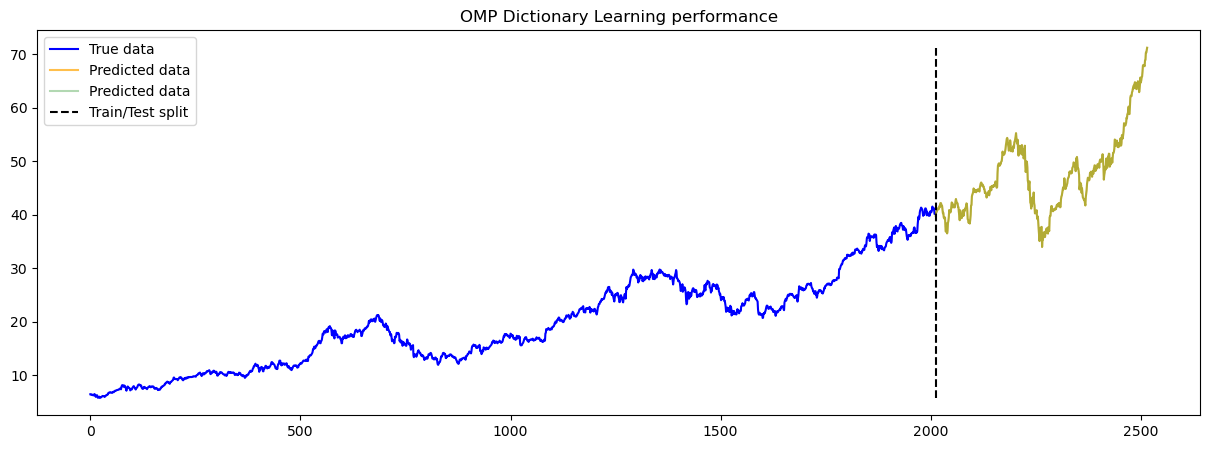

In [5]:
plt.figure(figsize=(15, 5))
plt.title("OMP Dictionary Learning performance")
abscissa = np.arange(len(df))

plt.plot(abscissa[:len(data_historical)], data_historical, label="True data", color="blue")
plt.plot(abscissa[-len(data_test):], data_test, label="Predicted data", alpha=0.7, color="orange")
plt.plot(abscissa[-len(data_test):], data_predicted, label="Predicted data", alpha=0.3, color="green")

plt.vlines(len(data_historical), ymin=min(df), ymax=max(df), colors='black', linestyles='dashed', label="Train/Test split")

plt.legend()
plt.show()

In [40]:
df = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
data = df['Close'].values.squeeze().reshape(1, -1)
data.shape

[*********************100%***********************]  1 of 1 completed


(1, 2516)

In [41]:
model = FinancialDictionaryLearning(n_components=1, n_nonzero_coefs=1)
model.fit(data)
sparse_codes = model.transform(data)
reconstructed_ts = model.reconstruct(sparse_codes)

In [22]:
reconstructed_ts

array([-1.39208978, -0.58648247,  0.6224812 ,  0.81189456, -0.84647254,
       -0.76315953, -0.7617946 ,  1.30332566,  0.56989817,  0.4586094 ,
       -0.83234305,  0.25526772, -0.51033618, -1.88934373, -0.85332023,
       -1.10361119,  0.39384022, -1.71668451,  0.66002119,  0.64866699,
       -0.74292785, -0.05796011, -2.20912338, -2.03143622, -0.62002051,
       -1.3634137 ,  0.81361342,  1.0145851 , -2.03753918, -1.53171585,
        1.04150282, -0.8029995 ,  1.11683884, -2.68698467,  0.45960198,
        0.74174352, -0.13943147,  0.81184065,  1.07859349,  0.94549668,
        0.03456044,  0.43857468, -0.15951291,  0.20111306, -0.7730719 ,
       -0.30612068, -0.49437779, -0.40715433, -0.44797459, -1.47661883])

In [42]:
abs(reconstructed_ts - data).sum()

5.3512749786932545e-12

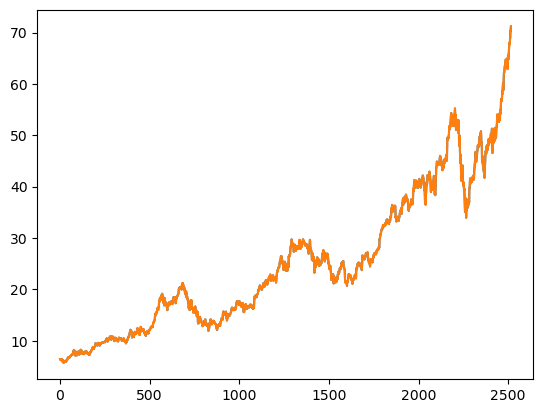

In [43]:
plt.plot(data.squeeze(), label="True data")
plt.plot(reconstructed_ts.squeeze(), label="Reconstructed data")